In [2]:
import os
import nltk
import io
import sys
#!{sys.executable} -m pip install SpeechRecognition

import speech_recognition as sr

# you'll need to run nltk.download() and download all packages
#nltk.download_shell()
#nltk.download('stopwords')
#nltk.download('punkt')
#nltk.data.path.append('D:\\JacobSchool\\CS540\\nltk_data')
from nltk.corpus import stopwords
from nltk.probability import ConditionalFreqDist

In [3]:
from nltk.tokenize import sent_tokenize, word_tokenize

Sets from http://www.iaees.org/publications/journals/selforganizology/articles/2016-3(3)/algorithm-to-transform-natural-language-into-SQL-queries.pdf
Escape Word Set<br/>
Expression Mapping Set<br/>
Noun Set<br/>
Verb Set<br/>
Semantic Set<br/>
Variable Set<br/>
Relation Set<br/>
Attribute Set<br/>
Conjunction Set<br/>
This is all the sets for words and rules:

In [4]:
escape_words = set(stopwords.words('english'))#["a", "an", "the", "which", "is", "of", "with", "to", "for", "are", "and", "should", "be"]

rules_on_top_of = []

rules_side_by_side = []

nouns = ["block", "wildcard", "block0", "block1", "block2", "block3", "block4", "block5", "block6", "block7", "block8", "block9", \
         "block9","block10", "block11", "block12", "block13", "block14", "block15", "block16", "block17", "block18", "block19", \
         "block20", "block21", "block22", "block23", "block24", "block25", "block26", "block27", "block28", "block29", \
         "block30", "block31", "block32", "block33", "block34", "block35", "block36", "block37", "block38", "block39", \
         "block40", "block41", "block42", "block43", "block44", "block45", "block46", "block47", "block48", "block49", \
         "block50", "block51", "block52", "block53", "block54", "block55", "block56", "block57", "block58", "block59", \
         "block60", "block61", "block62", "block63", "block64", "block65", "block66", "block67", "block68", "block69", \
         "block70", "block71", "block72", "block73", "block74", "block75", "block76", "block77", "block78", "block79", \
         "block80", "block81", "block82", "block83", "block84", "block85", "block86", "block87", "block88", "block89", \
         "block90", "block91", "block92", "block93", "block94", "block95", "block96", "block97", "block98", "block99", \
         "wildcard0", "wildcard1", "wildcard2", "wildcard3", "wildcard4", "wildcard5", "wildcard6", "wildcard7", "wildcard8", "wildcard9", \
         "wildcard10", "wildcard11", "wildcard12", "wildcard13", "wildcard14", "wildcard15", "wildcard16", "wildcard17", "wildcard18", "wildcard19", \
         "wildcard20", "wildcard21", "wildcard22", "wildcard23", "wildcard24", "wildcard25", "wildcard26", "wildcard27", "wildcard28", "wildcard29", \
         "wildcard30", "wildcard31", "wildcard32", "wildcard33", "wildcard34", "wildcard35", "wildcard36", "wildcard37", "wildcard38", "wildcard39", \
         "wildcard40", "wildcard41", "wildcard42", "wildcard43", "wildcard44", "wildcard45", "wildcard46", "wildcard47", "wildcard48", "wildcard49", \
         "wildcard50", "wildcard51", "wildcard52", "wildcard53", "wildcard54", "wildcard55", "wildcard56", "wildcard57", "wildcard58", "wildcard59", \
         "wildcard60", "wildcard61", "wildcard62", "wildcard63", "wildcard64", "wildcard65", "wildcard66", "wildcard67", "wildcard68", "wildcard69", \
         "wildcard70", "wildcard71", "wildcard72", "wildcard73", "wildcard74", "wildcard75", "wildcard76", "wildcard77", "wildcard78", "wildcard79", \
         "wildcard80", "wildcard81", "wildcard82", "wildcard83", "wildcard84", "wildcard85", "wildcard86", "wildcard87", "wildcard88", "wildcard89", \
         "wildcard90", "wildcard91", "wildcard92", "wildcard93", "wildcard94", "wildcard95", "wildcard96", "wildcard97", "wildcard98", "wildcard99" ]

verbs_top = ["top", "above", "over", "on"]
verbs_below = ["below", "underneath",  "under"]
verbs_side = ["side", "neighboring", "beside", "next"]

variables_colors = ["amber", "amethyst", "apricot", "aquamarine", "azure", "beige", "black", "blue", "blush", "bronze", "brown", "burgundy", "byzantium", "carmine", "cerise", "cerulean", "champagne", "chocolate", "coffee", "copper", "coral", "crimson", "cyan", "emerald", "erin", "gold", "gray", "green", "harlequin", "indigo", "ivory", "jade", "lavender", "lemon", "lilac", "lime", "magenta", "maroon", "mauve", "navy", "ochre", "olive", "orange", "orchid", "peach", "pearl", "periwinkle", "pink", "plum", "puce", "purple", "raspberry", "red", "rose", "ruby", "salmon", "sangria", "sapphire", "scarlet", "silver", "tan", "taupe", "teal", "turquoise", "ultramarine", "violet", "viridian", "white", "yellow"]
#variables_location = ["0","zero","1", "one", "2", "two", "3", "three", "4", "four", "5", "five", "6", "six", "7", "seven", "8", "eight", "9", "nine"]
loc_options = ["move", "location", "spot", "position", "address", "place", "locality", "point", "placement", "locale", "setting", "bearings", "bearing", "venue", "is", "at"]

#position, place, situation, site, locality, locale, spot, whereabouts, point, placement; scene, setting, area, environment; bearings, orientation; venue, address;

Custom Tags:<br/>
NN &rightarrow; Noun<br/>
VT &rightarrow; Verb Top<br/>
VB &rightarrow; Verb Below<br/>
VS &rightarrow; Verb Side<br/>
VarC &rightarrow; Variable Color<br/>
VarL &rightarrow; Variable Location<br/>

In [5]:
def enumerate_parts(parts_of_speech):
    
    #for p in parts_of_speech:
    for i,w in enumerate(parts_of_speech):
        if(w[0] in nouns):
            tw = list(w)
            tw[1]='BNN'
            w=tuple(tw)
            parts_of_speech[i]=w
        elif(w[0] in variables_colors):
            tw = list(w)
            tw[1]='VARC'
            w=tuple(tw)
            parts_of_speech[i]=w
        elif(w[0] in verbs_top):
            tw = list(w)
            tw[1]='VT'
            w=tuple(tw)
            parts_of_speech[i]=w
        elif(w[0] in verbs_below):
            tw = list(w)
            tw[1]='VBOT' #Changed to a value that is not in the default parse list
            w=tuple(tw)
            parts_of_speech[i]=w
        elif(w[0] in verbs_side):
            tw = list(w)
            tw[1]='VS'
            w=tuple(tw)
            parts_of_speech[i]=w
        elif(w[0] in loc_options):
            tw = list(w)
            tw[1]='VARL'
            w=tuple(tw)
            parts_of_speech[i]=w


In [6]:
def processLocation(tagged_sentence):
        m_grammar = """BLOCK:  {<BNN><CD>}
                                {<BNN><NN><CD>}
                                {<BNN>?}
                        LOCATION: {<VARL><CD><CD><CD>}
                                  {<CD><CD><CD>}  
                        COMMA:    {<CD><,>*<CD><,>*<CD>}
                        LOCXYZ: {<NN.?|JJR>}
                        COORDINATE: {<CD>}"""
        #('x', 'NNP'), ('value', 'NN'), ('of', 'IN'), ('1', 'CD')
        chunkParser = nltk.RegexpParser(m_grammar)
        tree = chunkParser.parse(tagged_sentence)
        location = []
        x=""
        y=""
        z=""
        
        found_x=False
        found_y=False
        found_z=False
        
        #print(tree)
        for subtree in tree.subtrees():
            if subtree.label() == "LOCATION":
                #print("LOCATION: "+ str(subtree.leaves()))
                #Remove commas
                loc_values = subtree.leaves()[-3:]
                x = loc_values[0][0]
                y = loc_values[1][0]
                z = loc_values[2][0]
            if subtree.label() == "COMMA":
                print("COMMA: "+ str(subtree.leaves()))
                #Remove commas
                loc_values = [cmma for cmma in subtree.leaves() if cmma!= (',',',')]
                #loc_values = subtree.leaves()[-5:]
                x = loc_values[0][0]
                y = loc_values[1][0]
                z = loc_values[2][0]
            #Check for the LOCATION marker for x, y, and z
            #The assumption is the next CD or number belongs to that coordinate
            if subtree.label() == "LOCXYZ":
                #print("LOCXYZ: "+ str(subtree.leaves()))
                if "x" in subtree.leaves()[0]:
                    found_x = True
                if "y" in subtree.leaves()[0]:
                    found_y = True
                if "z" in subtree.leaves()[0]:
                    found_z = True
            #Locate a <CD> value that is by itself, and is preceeded by a LOCXYZ
            if subtree.label() == "COORDINATE" and (found_x or found_y or found_z):
                #print("COORDINATE: "+ str(subtree.leaves()[-1]))
                value = subtree.leaves()[-1]
                #Look for a the x y or z by itself
                #Clear the found_? flag
                if found_x:
                    x=value[0]
                    found_x = False
                if found_y:
                    y=value[0]
                    found_y = False
                if found_z:
                    z=value[0]
                    found_z = False
                    
        if x or y or z:
            location = [x,y,z]
            
        return location

In [7]:
def checkBlocks(parts_of_speech):
        m_grammar = """BLOCK:  {<BNN><CD>}
                                {<BNN><NN><CD>}
                                {<BNN>?}
                       SINGLE:  {<CD>}"""
        #('block', 'BNN'), ('1', 'CD'), ('is', 'VARL'), ('next', 'VS'), ('to', 'TO'), ('3', 'CD')
        #('block', 'BNN'), ('number', 'NN'), ('1', 'CD'), ('is', 'VARL'), ('next', 'VS'), ('to', 'TO'), ('3', 'CD')
        chunkParser = nltk.RegexpParser(m_grammar)
        
        tree = chunkParser.parse(parts_of_speech)

        blocks=[]
        singleNum = []
        #print(tree)
        #Collect the two blocks out of the parts of speech

        for subtree in tree.subtrees():
            #print(subtree)
            if subtree.label() == "BLOCK":
                #print("BLOCK: "+str(subtree.leaves()))                
                block_1 = subtree.leaves()[0][0]
                if(len(subtree.leaves())>2):
                    #Collect the last one
                    block_1 += subtree.leaves()[-1][0]
                elif(len(subtree.leaves())>1):
                    block_1 += subtree.leaves()[1][0]
                    #print("Block_1: " + block_1)
                blocks.append(block_1)
            if subtree.label() == "SINGLE":
                singleNum.append(subtree.leaves()[-1][0])
                #print("Single: " + str(singleNum))
        
        #Assume that a single number is referencing a block
        if len(singleNum) < 3:
            for n in singleNum:
                blocks.append("block"+n)
                
        #print("The Blocks: " + str(blocks))
        return blocks

In [8]:
def setRelation(parts_of_speech):
    m_grammar = """ONTOP: {<VT>.*}
                        BOTTOM: {<VBOT>.*}
                        SIDE: {<VS>.*}"""
    
    #Need to see if there is an and between the relations
    
    chunkParser = nltk.RegexpParser(m_grammar)
    tree = chunkParser.parse(parts_of_speech)
    
    #swap_on_top_of = False

    relations=[]
    for subtree in tree.subtrees():
        if subtree.label() == "ONTOP" or subtree.label() == "BOTTOM":
            if subtree.label() == "BOTTOM":
                #swap_on_top_of = True
                relations.append("bottom-of")
            else:
                relations.append("on-top-of")
            #print("ONTOP: "+str(subtree.leaves()))
        if subtree.label() == "SIDE":
            relations.append("side-by-side")
            #print("SIDE: "+str(subtree.leaves()))
    
    #print("The Relations: " + str(relations))
    return relations#,swap_on_top_of

In [9]:
def processColor(parts_of_speech):
    color=""
    m_grammar = """COLOR: {<VARC.*>}"""
    
    chunkParser = nltk.RegexpParser(m_grammar)
    tree = chunkParser.parse(parts_of_speech)
    for subtree in tree.subtrees():
        if subtree.label() == "COLOR":
                #print("COLOR: "+str(subtree.leaves()))
                color = subtree.leaves()[0][0]
                
    #print("The Color: " + color)
    return color

In [10]:
def chunkParts(p):
    m_grammar = """ONTOP: {<VT>.*}
                    BOTTOM: {<VBL>.*}
                    LOCATION: {<VARL>.*<.*>.*<CD>.*<CD>.*<CD>}
                            {<CD>.*<CD>.*<CD>}
                    SIDE: {<VS>.*}
                    BLOCK:  {<BNN>.*<CD>}
                            {<BNN>?}
                    COLOR: {<VARC.*>}"""
    #print(p)
    chunkParser = nltk.RegexpParser(m_grammar)
    return chunkParser.parse(p)

In [11]:
def processAndInSentence(parts_of_speech):
    m_grammar = """AND: {<CC>}"""
    
    chunkParser = nltk.RegexpParser(m_grammar)
    tree = chunkParser.parse(parts_of_speech)
    hasAnd = False
    
    for subtree in tree.subtrees():
        if subtree.label() == "AND":
                #print("AND: "+ str(subtree.leaves()))
                hasAnd = True

    return hasAnd

In [12]:
def format_command(outputfile, blocks, relations, color, location, hasAnd):
    #print("format_command")
    #print(blocks)
    #print(relations)
    #print(color)
    #print(location)
    #print(swap_on_top_of)
    try:
        thecommand = ""
        block1=""
        block2=""
        relation=""
        relation2=""

        #Set the first block
        if len(blocks) > 0:
            block1=blocks[0]
        
        #Set the first relation
        if len(relations) > 0:
            relation=relations[0]
            
        #Multiple blocks and one relations
        if (len(blocks)>1) and (len(blocks)<4) and len(relations)>0:
            for i, block in enumerate(blocks):
                if i > 0:
                    block2=block

                if block1 and block2 and relation:
                    if relations[0] == "bottom-of":#
                        thecommand += "(is %s %s %s)\n" %(block2, block1, "on-top-of")
                    else:
                        thecommand += "(is %s %s %s)\n" %(block1, block2, relation)            
        
        #Multiple blocks and multiple relations
        #Assumptions is that each pair of blocks goes with one relation: 2 to 1
        if len(blocks)>3 and len(relations)>1:
            #Grap 2 blocks at a time
            rel_count = 0
            for i, block in enumerate(blocks):
                mod = i % 2
                if mod == 0:
                    block1=block
                else:
                    block2=block
                    if relations[rel_count] == "bottom-of":# swap_on_top_of:
                        thecommand += "(is %s %s %s)\n" %(block2, block1, "on-top-of")
                    else:
                        thecommand += "(is %s %s %s)\n" %(block1, block2, relations[rel_count])

                    if rel_count < len(relations):
                        rel_count+=1

        #print("Block1: " + block1 + " Block2: " + block2)

        #Create the command for an is relation
        #if block1 and block2 and relation:
        #    if relations[rel_count] == "bottom-of":#swap_on_top_of:
        #        thecommand = "(is %s %s %s)\n" %(block2, block1, "on-top-of")
        #    else:
        #        thecommand = "(is %s %s %s)\n" %(block1, block2, relation)

        if block1 and color:
            thecommand = "(has %s color %s)\n" % (block1,color)

        if block1 and location and (len(location)==3):
            thecommand = "(has %s location %s %s %s)\n" % (block1,location[0],location[1],location[2])

        #pdb.set_trace()
        if thecommand != "":
            print("Storing Command(s): " + thecommand)
            with open(outputfile, "a") as myfile:
                myfile.write(thecommand)
            return "SUCCESS"
        else:
            return "FAILURE"
    except:
        return "FAILURE"

In [13]:
def partsOfSpeechTag(words, outputfile):
    
    #Part of Speech tagging    
    parts_speech = nltk.pos_tag(words)
    #print(parts_speech)
    #parts_of_speech.append(parts_speach)
        
    #print("\nParts of Speech for each sentence")
    #for p in parts_speech:
    #print("\nThe Parts of Speech:")
    print("Tokenized Words: " + str(words))
    enumerate_parts(parts_speech)
    print("Parts of Speech: " + str(parts_speech))
    tree = chunkParts(parts_speech)
    
    location = []
    block_1 = ""
    block_2 = ""
    color = ""
    relation = ""
    
    hasAnd = processAndInSentence(parts_speech)
    
    #Check for location value
    location = processLocation(parts_speech)
    
    #Array of blocks, allow for something like: Block 1 is next to block2 and block3.
    #Need to generate more than one command for that scenario
    #Will always assume the first block is the key block: Block 1 is next to block 2 and block3 is next to block4 will not work.
    #Maybe add something to catch the "and", if there are 4 blocks it can generate 2 commands.
    blocks = checkBlocks(parts_speech)
    
    #Set the type of relation
    relation = setRelation(parts_speech)
    
    #Set the color
    color = processColor(parts_speech)
    
    return format_command(outputfile, blocks, relation, color, location, hasAnd) 


In [29]:
from nltk.probability import ConditionalFreqDist
import sys
import os

def readinfile(inputfile, outputfile, printDist=False, returnResultList=False):
    #os.remove(inputfile) if os.path.exists(inputfile) else None
    os.remove(outputfile) if os.path.exists(outputfile) else None

    commandFile = open(inputfile) 
    data = commandFile.read()# Use this to read file content as a stream: 
    commandFile.close()
    
    cfdist = ConditionalFreqDist()
    resultList=[]
    
    sentences = sent_tokenize(data)
    
    print("sentence length: "+str(len(sentences)))
    for sentence in sentences:        
        words = word_tokenize(sentence)
        temp = []
        for w in words:
            temp.append(w.lower())
        words = temp[0:-1]
        
        #Parts of Speech tagging
        result=partsOfSpeechTag(words, outputfile)
        if(printDist):
            if(len(words)<5):
                condition='0 to 5'
            elif(len(words)>5 and len(words)<10):
                condition='5 to 10'
            elif(len(words)>10 and len(words)<15):
                condition='10 to 15'
            elif(len(words)>15 and len(words)<20):
                condition='15 to 20'
            elif(len(words)>20 and len(words)<25):
                condition='20 to 25'
            elif(len(words)>25 and len(words)<30):
                condition='25 to 30'
            elif(len(words)>30 and len(words)<40):
                condition='30 to 40'
            elif(len(words)>40 and len(words)<50):
                condition='40 to 50'

            cfdist[condition][result] += 1
        if(returnResultList):
            resultList.append(result)
        print()
    
    if(printDist):
        return cfdist
    if(returnResultList):
        return resultList

## Code for Speech Reecognition

In [14]:
r = sr.Recognizer()
recording = sr.AudioFile('Recording.wav')
with recording as source:
    audio = r.record(source)
recording_str = r.recognize_google(audio)
new_file=open("nlp_tests/Recording.txt",mode="w",encoding="utf-8")
new_file.write(recording_str)
new_file.close()

In [15]:
#Read in initial file
outputStart = "aStarSearch/nlp_outputs/start1.txt"
readinfile("nlp_tests/start1.txt", outputStart)

#Read in goal file
outputGoal = "aStarSearch/nlp_outputs/goal1.txt"
readinfile("nlp_tests/goal1.txt", outputGoal)


Tokenized Words: ['block', '1', 'has', 'color', 'red']
Parts of Speech: [('block', 'BNN'), ('1', 'CD'), ('has', 'VBZ'), ('color', 'NN'), ('red', 'VARC')]
Storing Command(s): (has block1 color red)


Tokenized Words: ['block2', 'has', 'location', '8', '3', '1']
Parts of Speech: [('block2', 'BNN'), ('has', 'VBZ'), ('location', 'VARL'), ('8', 'CD'), ('3', 'CD'), ('1', 'CD')]
Storing Command(s): (has block2 location 8 3 1)


Tokenized Words: ['block3', 'has', 'color', 'green']
Parts of Speech: [('block3', 'BNN'), ('has', 'VBZ'), ('color', 'NN'), ('green', 'VARC')]
Storing Command(s): (has block3 color green)


Tokenized Words: ['block1', 'is', 'at', 'the', 'spot', '8', '3', '0']
Parts of Speech: [('block1', 'BNN'), ('is', 'VARL'), ('at', 'VARL'), ('the', 'DT'), ('spot', 'VARL'), ('8', 'CD'), ('3', 'CD'), ('0', 'CD')]
Storing Command(s): (has block1 location 8 3 0)


Tokenized Words: ['block3', 'location', 'is', '8', '3', '2']
Parts of Speech: [('block3', 'BNN'), ('location', 'VARL'), ('is'

## Execute PA2

In [16]:
#!{sys.executable} -m pip install pandas
#import pandas as pd
%run -i "./aStarSearch/aStarSearch.py" $outputStart $outputGoal


Searching...

END STATE:
        Coordinates Properties
Block                         
block1    (4, 1, 0)      [red]
block2    (4, 0, 0)         []
block21   (3, 5, 0)         []
block23   (3, 4, 0)         []
block3    (4, 2, 0)    [green]
['command slide block21 -1 -1', 'command slide block21 -1 1', 'command slide block21 -1 -1', 'command slide block21 -1 1', 'command slide block21 -1 0', 'command slide block1 -1 -1', 'command slide block1 -1 -1', 'command slide block1 -1 -1', 'command slide block23 -1 1', 'command slide block23 -1 1', 'command slide block23 -1 -1', 'command slide block23 -1 0', 'command slide block23 -1 -1', 'command slide block23 1 1', 'command grab block3', 'command carry block3 -1 1 -1', 'command carry block3 1 0 -1', 'command release block3', 'command grab block2', 'command carry block2 -1 0 -1', 'command release block2', 'command grab block3', 'command release block3', 'command slide block23 -1 -1', 'command slide block1 -1 1', 'command slide block3 -1 1']
LE

# Success of SQL NLP vs. sentence length

sentence length: 49
Tokenized Words: ['for', 'block', '1', ',', 'x', 'is', 'at', '5', ',', 'y', 'is', 'at', '4', ',', 'and', 'z', 'is', 'at', '3']
Parts of Speech: [('for', 'IN'), ('block', 'BNN'), ('1', 'CD'), (',', ','), ('x', 'NN'), ('is', 'VARL'), ('at', 'VARL'), ('5', 'CD'), (',', ','), ('y', 'NN'), ('is', 'VARL'), ('at', 'VARL'), ('4', 'CD'), (',', ','), ('and', 'CC'), ('z', 'NN'), ('is', 'VARL'), ('at', 'VARL'), ('3', 'CD')]
Storing Command(s): (has block1 location 5 4 3)


Tokenized Words: ['block', '2', 'has', 'a', 'location', 'of', '4', '7', '9']
Parts of Speech: [('block', 'BNN'), ('2', 'CD'), ('has', 'VBZ'), ('a', 'DT'), ('location', 'VARL'), ('of', 'IN'), ('4', 'CD'), ('7', 'CD'), ('9', 'CD')]
Storing Command(s): (has block2 location 4 7 9)


Tokenized Words: ['block', '3', 'is', 'located', 'at', '0', '9', '4']
Parts of Speech: [('block', 'BNN'), ('3', 'CD'), ('is', 'VARL'), ('located', 'VBN'), ('at', 'VARL'), ('0', 'CD'), ('9', 'CD'), ('4', 'CD')]
Storing Command(s): (has


Tokenized Words: ['block', '65', 'is', 'at', 'location', 'six', ',', 'five', ',', 'four']
Parts of Speech: [('block', 'BNN'), ('65', 'CD'), ('is', 'VARL'), ('at', 'VARL'), ('location', 'VARL'), ('six', 'CD'), (',', ','), ('five', 'CD'), (',', ','), ('four', 'CD')]
COMMA: [('six', 'CD'), (',', ','), ('five', 'CD'), (',', ','), ('four', 'CD')]
Storing Command(s): (has block65 location six five four)


Tokenized Words: ['block', '66', 'is', 'at', '1,2,3']
Parts of Speech: [('block', 'BNN'), ('66', 'CD'), ('is', 'VARL'), ('at', 'VARL'), ('1,2,3', 'CD')]

Tokenized Words: ['1,2,4', 'is', 'x', ',', 'y', ',', 'z', 'for', 'block', '67']
Parts of Speech: [('1,2,4', 'CD'), ('is', 'VARL'), ('x', 'VBN'), (',', ','), ('y', 'PRP'), (',', ','), ('z', 'NN'), ('for', 'IN'), ('block', 'BNN'), ('67', 'CD')]

Tokenized Words: ['5', ',', '6', ',', '7', 'is']
Parts of Speech: [('5', 'CD'), (',', ','), ('6', 'CD'), (',', ','), ('7', 'CD'), ('is', 'VARL')]
COMMA: [('5', 'CD'), (',', ','), ('6', 'CD'), (',', 

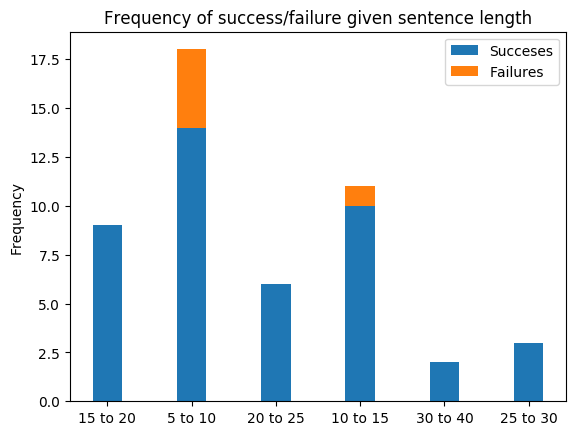

15 to 20: Probability of SUCCESS: 1.0

5 to 10: Probability of SUCCESS: 0.7777777777777778
5 to 10: Probability of FAILURE: 0.2222222222222222

20 to 25: Probability of SUCCESS: 1.0

10 to 15: Probability of SUCCESS: 0.9090909090909091
10 to 15: Probability of FAILURE: 0.09090909090909091

30 to 40: Probability of SUCCESS: 1.0

25 to 30: Probability of SUCCESS: 1.0



In [30]:


outputStart = "aStarSearch/nlp_outputs/graphing_output.txt"
cfdist=readinfile("nlp_tests/graphing_input.txt", outputStart, printDist=True)

import matplotlib.pyplot as plt; plt.rcdefaults()
import numpy as np
import matplotlib.pyplot as plt

objects=[]
successes=[]
failures=[]
for f in cfdist:
    objects.append(f)
    successes.append(cfdist[f]["SUCCESS"])
    failures.append(cfdist[f]["FAILURE"])

width=.35
p1 = plt.bar(np.arange(len(successes)), successes, width)
p2 = plt.bar(np.arange(len(successes)), failures, width, bottom=successes)

plt.ylabel('Frequency')
plt.title('Frequency of success/failure given sentence length')
plt.xticks(np.arange(len(successes)), objects)
#plt.yticks(np.arange(0, 81, 10))
plt.legend((p1[0], p2[0]), ('Succeses', 'Failures'))

plt.show()

for f in cfdist:
    for k in cfdist[f]:
        print(str(f)+": Probability of " +str(k)+": "+str(cfdist[f].freq(k)))
    print()




# Success of SQL NLP vs. sentence complexity

To determine the sentence complexity array below, the graphing_input.txt file was fun on stanford_parser.py code on CS machines.  I wasn't able to get this running locally. Complexity was determined by counting the number of subtrees when each sentence was run through the StanfordParser.  Code for this is provided below.  

In [26]:
import sys
import os
from nltk.parse import stanford

import nltk
#nltk.download('punkt')
from nltk.tokenize import sent_tokenize
dir_path = '/s/chopin/l/grad/mgorb/CS540'

os.environ['STANFORD_PARSER'] = dir_path + '/stanford-parser-full-2018-10-17'
os.environ['STANFORD_MODELS'] = dir_path + '/stanford-parser-full-2018-10-17'

parser = stanford.StanfordParser(model_path= dir_path + '/englishPCFG.ser.gz')

inputfile="graphing_input.txt"
commandFile = open(inputfile) 
data = commandFile.read()# Use this to read file content as a stream: 
commandFile.close()
sentences_ = sent_tokenize(data)

complexity=[]
for s in sentences_:
    i=0
    sentences = parser.raw_parse_sents(s)
    for line in sentences:
        for sentence in line:
            i+=1
        complexity.append(i)
print(complexity)

/usr/local/lib/python3.7/site-packages/ipykernel_launcher.py:13: DeprecationWarning: The StanfordParser will be deprecated
Please use nltk.parse.corenlp.CoreNLPParser instead.
  del sys.path[0]


LookupError: 

===========================================================================
  NLTK was unable to find stanford-parser\.jar! Set the CLASSPATH
  environment variable.

  For more information, on stanford-parser\.jar, see:
    <https://nlp.stanford.edu/software/lex-parser.shtml>
===========================================================================

Tokenized Words: ['for', 'block', '1', ',', 'x', 'is', 'at', '5', ',', 'y', 'is', 'at', '4', ',', 'and', 'z', 'is', 'at', '3']
Parts of Speech: [('for', 'IN'), ('block', 'BNN'), ('1', 'CD'), (',', ','), ('x', 'NN'), ('is', 'VARL'), ('at', 'VARL'), ('5', 'CD'), (',', ','), ('y', 'NN'), ('is', 'VARL'), ('at', 'VARL'), ('4', 'CD'), (',', ','), ('and', 'CC'), ('z', 'NN'), ('is', 'VARL'), ('at', 'VARL'), ('3', 'CD')]
Storing Command(s): (has block1 location 5 4 3)


Tokenized Words: ['block', '2', 'has', 'a', 'location', 'of', '4', '7', '9']
Parts of Speech: [('block', 'BNN'), ('2', 'CD'), ('has', 'VBZ'), ('a', 'DT'), ('location', 'VARL'), ('of', 'IN'), ('4', 'CD'), ('7', 'CD'), ('9', 'CD')]
Storing Command(s): (has block2 location 4 7 9)


Tokenized Words: ['block', '3', 'is', 'located', 'at', '0', '9', '4']
Parts of Speech: [('block', 'BNN'), ('3', 'CD'), ('is', 'VARL'), ('located', 'VBN'), ('at', 'VARL'), ('0', 'CD'), ('9', 'CD'), ('4', 'CD')]
Storing Command(s): (has block3 location 0 9

Tokenized Words: ['block', '60', 'should', 'have', 'the', 'same', 'color', 'as', 'block', '54', '(', 'red', ')']
Parts of Speech: [('block', 'BNN'), ('60', 'CD'), ('should', 'MD'), ('have', 'VB'), ('the', 'DT'), ('same', 'JJ'), ('color', 'NN'), ('as', 'IN'), ('block', 'BNN'), ('54', 'CD'), ('(', '('), ('red', 'VARC'), (')', ')')]
Storing Command(s): (has block60 color red)


Tokenized Words: ['block', '61', 'might', 'fail', 'to', 'parse', 'correctly', 'if', 'format', 'the', 'sentence', 'as', 'x', ',', 'y', ',', 'z', 'equal', 'to', '1,2,3']
Parts of Speech: [('block', 'BNN'), ('61', 'CD'), ('might', 'MD'), ('fail', 'VB'), ('to', 'TO'), ('parse', 'VB'), ('correctly', 'RB'), ('if', 'IN'), ('format', 'VBN'), ('the', 'DT'), ('sentence', 'NN'), ('as', 'IN'), ('x', 'NN'), (',', ','), ('y', 'NN'), (',', ','), ('z', 'VBP'), ('equal', 'JJ'), ('to', 'TO'), ('1,2,3', 'CD')]
Storing Command(s): (has block61 location 1,2,3 1,2,3 )


Tokenized Words: ['1,2,3', 'is', 'x', ',', 'y', ',', 'z', 'for', 'b

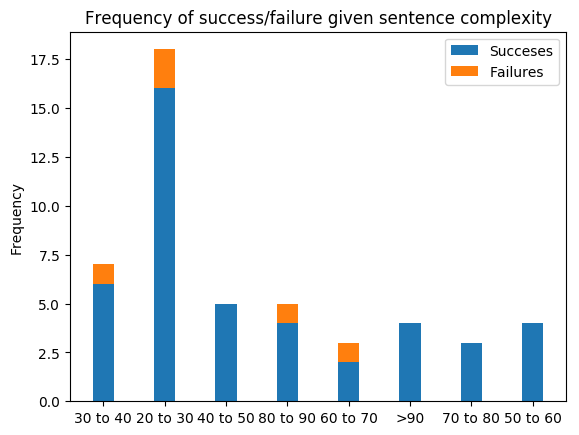

30 to 40: Probability of SUCCESS: 0.8571428571428571
30 to 40: Probability of FAILURE: 0.14285714285714285

20 to 30: Probability of SUCCESS: 0.8888888888888888
20 to 30: Probability of FAILURE: 0.1111111111111111

40 to 50: Probability of SUCCESS: 1.0

80 to 90: Probability of SUCCESS: 0.8
80 to 90: Probability of FAILURE: 0.2

60 to 70: Probability of SUCCESS: 0.6666666666666666
60 to 70: Probability of FAILURE: 0.3333333333333333

>90: Probability of SUCCESS: 1.0

70 to 80: Probability of SUCCESS: 1.0

50 to 60: Probability of SUCCESS: 1.0



In [25]:
outputStart = "aStarSearch/nlp_outputs/graphing_output.txt"
results=readinfile("nlp_tests/graphing_input.txt", outputStart, printDist=False, returnResultList=True)

complexity=[34, 24, 21, 27, 41, 23, 81, 61, 83, 
            36, 120, 78, 43, 49, 37, 74, 53, 24, 
            22, 31, 42, 26, 25, 23, 28, 19, 52, 34,
            59, 76, 92, 66, 21, 49, 110, 
            35, 25, 102, 27, 53, 29, 86, 86, 34, 
            21, 30, 27, 83, 63, 76]

cfdist = ConditionalFreqDist()
for i, j in zip(results, complexity):
    if(j>20 and j<30):
        condition='20 to 30'
    elif(j>30 and j<40):
        condition='30 to 40'
    elif(j>40 and j<50):
        condition='40 to 50'
    elif(j>50 and j<60):
        condition='50 to 60'
    elif(j>60 and j<70):
        condition='60 to 70'
    elif(j>70 and j<80):
        condition='70 to 80'
    elif(j>80 and j<90):
        condition='80 to 90'
    elif(j>90):
        condition='>90'
    cfdist[condition][i] += 1
    
objects=[]
successes=[]
failures=[]
for f in cfdist:
    objects.append(f)
    successes.append(cfdist[f]["SUCCESS"])
    failures.append(cfdist[f]["FAILURE"])

width=.35
p1 = plt.bar(np.arange(len(successes)), successes, width)
p2 = plt.bar(np.arange(len(successes)), failures, width, bottom=successes)

plt.ylabel('Frequency')
plt.title('Frequency of success/failure given sentence complexity')
plt.xticks(np.arange(len(successes)), objects)
plt.legend((p1[0], p2[0]), ('Succeses', 'Failures'))

plt.show()

for f in cfdist:
    for k in cfdist[f]:
        print(str(f)+": Probability of " +str(k)+": "+str(cfdist[f].freq(k)))
    print()
        

## Failures

In [170]:
outputStart = "aStarSearch/nlp_outputs/failures.txt"
results=readinfile("nlp_tests/failures.txt", outputStart, printDist=False, returnResultList=False)


Tokenized Words: ['block', '6', 'is', 'located', 'at', '4', ',', '4', ',', '3']
Parts of Speech: [('block', 'BNN'), ('6', 'CD'), ('is', 'VARL'), ('located', 'VBN'), ('at', 'VARL'), ('4', 'CD'), (',', ','), ('4', 'CD'), (',', ','), ('3', 'CD')]

Tokenized Words: ['furthermore', ',', 'if', 'i', 'make', 'longer', 'sentences', ',', 'will', 'block', '8', 'be', 'on', 'top', 'of', 'block9']
Parts of Speech: [('furthermore', 'RB'), (',', ','), ('if', 'IN'), ('i', 'JJ'), ('make', 'VBP'), ('longer', 'JJR'), ('sentences', 'NNS'), (',', ','), ('will', 'MD'), ('block', 'BNN'), ('8', 'CD'), ('be', 'VB'), ('on', 'VT'), ('top', 'VT'), ('of', 'IN'), ('block9', 'NN')]

Tokenized Words: ['block', '21', 'has', 'x', 'equal', 'to', '9', ',', 'y', 'equal', 'to', '3', 'and', 'z', 'equal', 'to', '0']
Parts of Speech: [('block', 'BNN'), ('21', 'CD'), ('has', 'VBZ'), ('x', 'VBN'), ('equal', 'JJ'), ('to', 'TO'), ('9', 'CD'), (',', ','), ('y', 'RB'), ('equal', 'JJ'), ('to', 'TO'), ('3', 'CD'), ('and', 'CC'), ('z',

# Other Measures of Readibility

from https://en.wikipedia.org/wiki/Readability 
work in progress

In [97]:
#before you can run download spacy and textstat with pip
#pip install spacy
#pip install textstat

#code based on https://www.geeksforgeeks.org/readability-index-pythonnlp/
#Explanations for different measures on https://en.wikipedia.org/wiki/Readability

import spacy 
from nltk.tokenize import RegexpTokenizer
from textstat.textstat import textstatistics, easy_word_set, legacy_round 
tokenizer = RegexpTokenizer(r'\w+')

# Splits the text into sentences, using 
# Spacy's sentence segmentation which can 
# be found at https://spacy.io/usage/spacy-101 
def break_sentences(text):  
    return sent_tokenize(text)

# Returns Number of Words in the text 
def word_count(text): 
    
    sentences = break_sentences(text) 
    words = 0
    for sentence in sentences: 
        words += len(tokenizer.tokenize(sentence)) 
    return words 

# Returns the number of sentences in the text 
def sentence_count(text): 
    sentences = break_sentences(text) 
    return len(sentences) 

# Returns average sentence length 
def avg_sentence_length(text): 
    words = word_count(text) 
    sentences = sentence_count(text) 
    average_sentence_length = float(words / sentences) 
    return average_sentence_length 

# Textstat is a python package, to calculate statistics from 
# text to determine readability, 
# complexity and grade level of a particular corpus. 
# Package can be found at https://pypi.python.org/pypi/textstat 
def syllables_count(word): 
    return textstatistics().syllable_count(word) 

# Returns the average number of syllables per 
# word in the text 
def avg_syllables_per_word(text): 
    syllable = syllables_count(text) 
    words = word_count(text) 
    ASPW = float(syllable) / float(words) 
    return legacy_round(ASPW, 1) 

# Return total Difficult Words in a text 
def difficult_words(text): 

    # Find all words in the text 
    words = [] 
    sentences = break_sentences(text) 
    for sentence in sentences: 
        words += tokenizer.tokenize(sentence) 
    # difficult words are those with syllables >= 2 
    # easy_word_set is provide by Textstat as 
    # a list of common words 
    diff_words_set = set() 

    for word in words: 
        syllable_count = syllables_count(word) 
        if word not in easy_word_set and syllable_count >= 2: 
            diff_words_set.add(word) 

    return len(diff_words_set) 

# A word is polysyllablic if it has more than 3 syllables 
# this functions returns the number of all such words 
# present in the text 
def poly_syllable_count(text): 
    count = 0
    words = [] 
    sentences = break_sentences(text) 
    for sentence in sentences: 
        words += tokenizer.tokenize(sentence) 


    for word in words: 
        syllable_count = syllables_count(word) 
        if syllable_count >= 3: 
            count += 1
    return count 


def flesch_reading_ease(text): 
    """ 
        Implements Flesch Formula: 
        Reading Ease score = 206.835 - (1.015 × ASL) - (84.6 × ASW) 
        Here, 
        ASL = average sentence length (number of words 
                divided by number of sentences) 
        ASW = average word length in syllables (number of syllables 
                divided by number of words) 
    """
    FRE = 206.835 - float(1.015 * avg_sentence_length(text)) -float(84.6 * avg_syllables_per_word(text)) 
    return legacy_round(FRE, 2) 


def gunning_fog(text): 
    per_diff_words = (difficult_words(text) / word_count(text) * 100) + 5
    grade = 0.4 * (avg_sentence_length(text) + per_diff_words) 
    return grade 


def smog_index(text): 
    """ 
        Implements SMOG Formula / Grading 
        SMOG grading = 3 + ?polysyllable count. 
        Here, 
        polysyllable count = number of words of more 
        than two syllables in a sample of 30 sentences. 
    """

    if sentence_count(text) >= 3: 
        poly_syllab = poly_syllable_count(text) 
        SMOG = (1.043 * (30*(poly_syllab / sentence_count(text)))**0.5) + 3.1291
        return legacy_round(SMOG, 1) 
    else: 
        return 0


def dale_chall_readability_score(text): 
    """ 
        Implements Dale Challe Formula: 
        Raw score = 0.1579*(PDW) + 0.0496*(ASL) + 3.6365 
        Here, 
            PDW = Percentage of difficult words. 
            ASL = Average sentence length 
    """
    words = word_count(text) 
    # Number of words not termed as difficult words 
    count = words - difficult_words(text) 
    if words > 0: 

        # Percentage of words not on difficult word list 

        per = float(count) / float(words) * 100

    # diff_words stores percentage of difficult words 
    diff_words = 100 - per 
    print(diff_words)
    raw_score = (0.1579 * diff_words) + (0.0496 * avg_sentence_length(text)) 
    
    # If Percentage of Difficult Words is greater than 5 %, then; 
    # Adjusted Score = Raw Score + 3.6365, 
    # otherwise Adjusted Score = Raw Score 

    if diff_words > 5:	 
        raw_score += 3.6365
    score = raw_score
    return legacy_round(score, 2) 

commandFile = open("nlp_tests/graphing_input.txt") 
data = commandFile.read()# Use this to read file content as a stream: 
commandFile.close()
# smog_index(data)